In [79]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [22,8]
plt.style.use('ggplot')
import itertools

In [81]:
# data from https://www.sec.gov/data/foiadocsfailsdatahtm

In [82]:
!sed -n 1,5p './cnsfails202101a.txt'

SETTLEMENT DATE|CUSIP|SYMBOL|QUANTITY (FAILS)|DESCRIPTION|PRICE
20210104|B38564108|EURN|19305|EURONAV NV ANTWERPEN (BELGIUM)|8.00
20210104|D18190898|DB|11259|DEUTSCHE BANK AG NAMEN AKT (DE|10.90
20210104|G00748106|STWO|17643|ACON S2 ACQUISITION CORP.CL A |10.08
20210104|G00748122|STWOU|3141|ACON S2 ACQUIST CORP UNIT 1 CL|10.50


In [83]:
!mv 

usage: mv [-f | -i | -n] [-v] source target
       mv [-f | -i | -n] [-v] source ... directory


In [84]:
df = pd.read_csv('./cnsfails202101a.txt', sep="|")

In [85]:
df.head()

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
0,20210104,B38564108,EURN,19305.0,EURONAV NV ANTWERPEN (BELGIUM),8.00
1,20210104,D18190898,DB,11259.0,DEUTSCHE BANK AG NAMEN AKT (DE,10.90
2,20210104,G00748106,STWO,17643.0,ACON S2 ACQUISITION CORP.CL A,10.08
3,20210104,G00748122,STWOU,3141.0,ACON S2 ACQUIST CORP UNIT 1 CL,10.50
4,20210104,G0083D104,ACEVW,42372.0,ACE CONVERGENCE ACQUISITION CO,1.39


In [86]:
df.tail()

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
48212,20210114,98985W102,ZYME,12178.0,ZYMEWORKS INC COM,52.95
48213,20210114,98986M103,ZYXI,1204.0,"ZYNEX, INC. COMMON STOCK (NV)",14.85
48214,20210114,98986X109,ZYNE,16336.0,ZYNERBA PHARMACEUTICALS INC CO,3.52
48215,Trailer record count 48215,NaN,NaN,NaN,NaN,NaN
48216,Trailer total quantity of shares 1988791343,NaN,NaN,NaN,NaN,NaN


In [87]:
df = df.iloc[:-2]
df.tail()

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
48210,20210114,989817101,ZUMZ,260.0,ZUMIEZ INC COM,43.70
48211,20210114,989825104,ZURVY,256.0,ZURICH INSURANCE GRP LTD SPONS,42.70
48212,20210114,98985W102,ZYME,12178.0,ZYMEWORKS INC COM,52.95
48213,20210114,98986M103,ZYXI,1204.0,"ZYNEX, INC. COMMON STOCK (NV)",14.85
48214,20210114,98986X109,ZYNE,16336.0,ZYNERBA PHARMACEUTICALS INC CO,3.52


<AxesSubplot:>

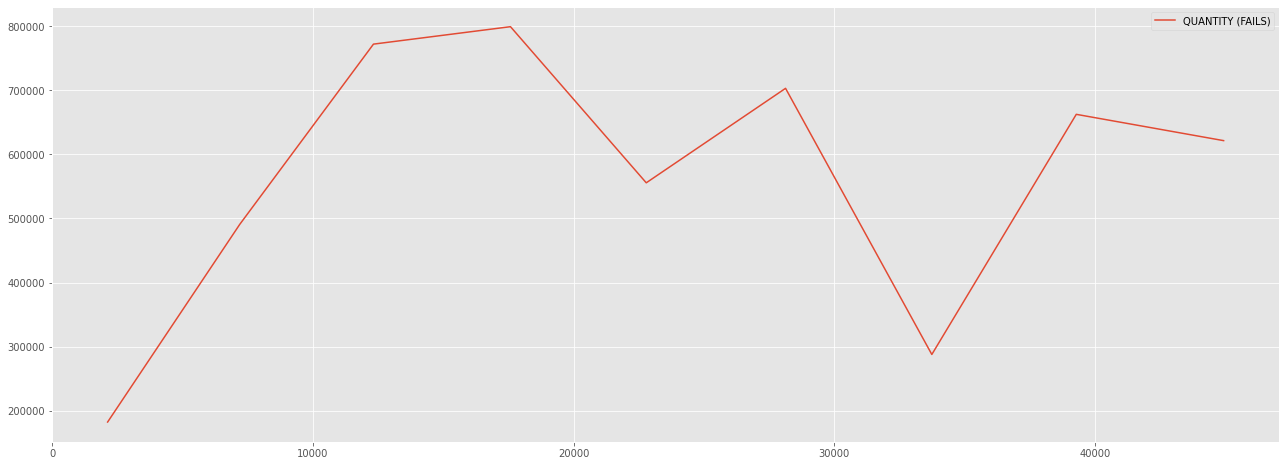

In [88]:
df[df["SYMBOL"] == "GME"].sort_values(by="SETTLEMENT DATE", ascending=True).plot()

In [89]:
dfs = [pd.read_csv(f'./cnsfails2020{name}.txt', sep="|").iloc[:-2] for name in [str(num) + l for num, l in itertools.product(["08", "09", "10", "11", "12"], "ab")]]

In [90]:
df_full = pd.concat([df] + dfs)

In [91]:
df_full.head(5)

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
0,20210104,B38564108,EURN,19305.0,EURONAV NV ANTWERPEN (BELGIUM),8.00
1,20210104,D18190898,DB,11259.0,DEUTSCHE BANK AG NAMEN AKT (DE,10.90
2,20210104,G00748106,STWO,17643.0,ACON S2 ACQUISITION CORP.CL A,10.08
3,20210104,G00748122,STWOU,3141.0,ACON S2 ACQUIST CORP UNIT 1 CL,10.50
4,20210104,G0083D104,ACEVW,42372.0,ACE CONVERGENCE ACQUISITION CO,1.39


In [92]:
df_full["date"] = pd.to_datetime(df_full["SETTLEMENT DATE"], format="%Y/%m/%d")

In [93]:
df_full = df_full.set_index("date")

In [98]:
gme_fails = df_full[df_full["SYMBOL"] == "GME"]

Text(0.5, 1.0, "\n    Number of total number of fails-to-deliver (i.e., the balance level outstanding) recorded in the National Securities Clearing Corporation's \n    ('NSCC') Continuous Net Settlement (CNS) system aggregated over all NSCC members \n\n    for stock GME\n")

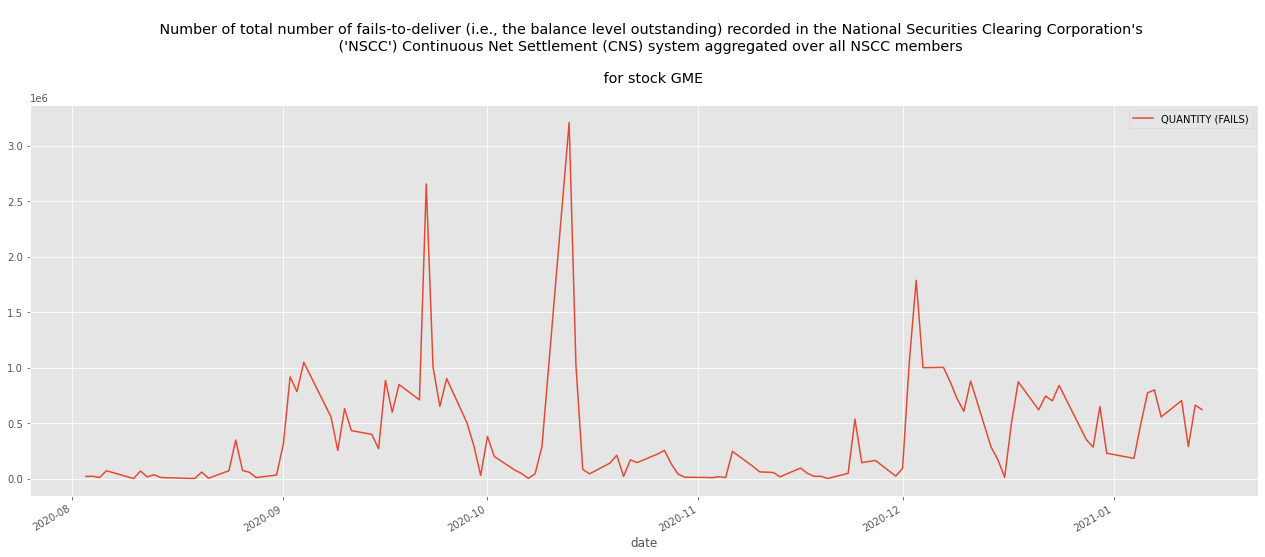

In [99]:
gme_fails.sort_values(by="SETTLEMENT DATE", ascending=True).plot()
plt.title("""
    Number of total number of fails-to-deliver (i.e., the balance level outstanding) recorded in the National Securities Clearing Corporation's 
    ('NSCC') Continuous Net Settlement (CNS) system aggregated over all NSCC members \n
    for stock GME
""")

In [ ]:
# price data from https://finance.yahoo.com/quote/GME/history?p=GME

In [95]:
!sed -n 1,5p './GME.csv'

Date,Open,High,Low,Close,Adj Close,Volume
2020-08-03,4.030000,4.250000,4.000000,4.150000,4.150000,2517600
2020-08-04,4.130000,4.740000,4.130000,4.430000,4.430000,10361400
2020-08-05,4.500000,4.760000,4.250000,4.630000,4.630000,4925700
2020-08-06,4.600000,4.660000,4.380000,4.430000,4.430000,1901200


In [96]:
price_df = pd.read_csv('./GME.csv')

In [100]:
price_df["date"] = pd.to_datetime(price_df["Date"])

In [101]:
price_df = price_df.set_index("date")

In [104]:
j_df = price_df.join(gme_fails)

In [105]:
j_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
date,,,,,,,,,,,,,
2020-08-03,2020-08-03,4.03,4.25,4.00,4.15,4.15,2517600,20200803,36467W109,GME,19581.0,GAMESTOP CORP (HLDG CO) CL A,4.01
2020-08-04,2020-08-04,4.13,4.74,4.13,4.43,4.43,10361400,20200804,36467W109,GME,20822.0,GAMESTOP CORP (HLDG CO) CL A,4.15
2020-08-05,2020-08-05,4.50,4.76,4.25,4.63,4.63,4925700,20200805,36467W109,GME,9693.0,GAMESTOP CORP (HLDG CO) CL A,4.43
2020-08-06,2020-08-06,4.60,4.66,4.38,4.43,4.43,1901200,20200806,36467W109,GME,70632.0,GAMESTOP CORP (HLDG CO) CL A,4.63
2020-08-07,2020-08-07,4.39,4.40,4.06,4.16,4.16,3341100,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, "\n    Number of total number of fails-to-deliver (i.e., the balance level outstanding) recorded in the National Securities Clearing Corporation's \n    ('NSCC') Continuous Net Settlement (CNS) system aggregated over all NSCC members \n\n    for stock GME\n")

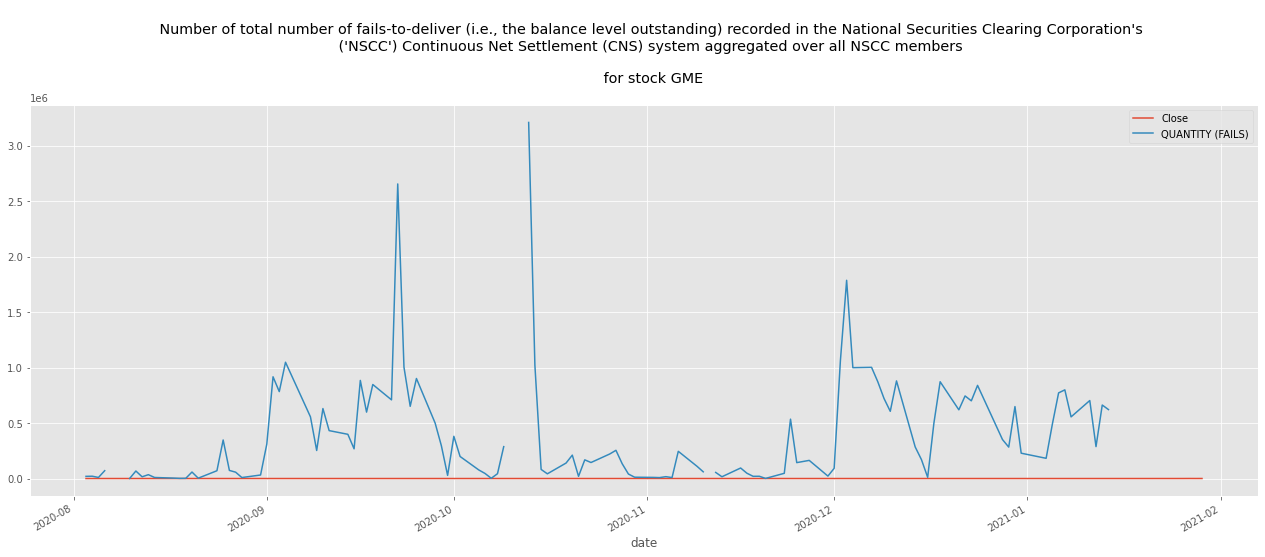

In [111]:
j_df[["Close", "QUANTITY (FAILS)"]].plot()
plt.title("""
    Number of total number of fails-to-deliver (i.e., the balance level outstanding) recorded in the National Securities Clearing Corporation's 
    ('NSCC') Continuous Net Settlement (CNS) system aggregated over all NSCC members \n
    for stock GME
""")

Text(0.5, 1.0, "\n    Close price and Number of total number of fails-to-deliver (i.e., the balance level outstanding) recorded in the National Securities Clearing Corporation's \n    ('NSCC') Continuous Net Settlement (CNS) system aggregated over all NSCC members \n\n    for stock GME\n")

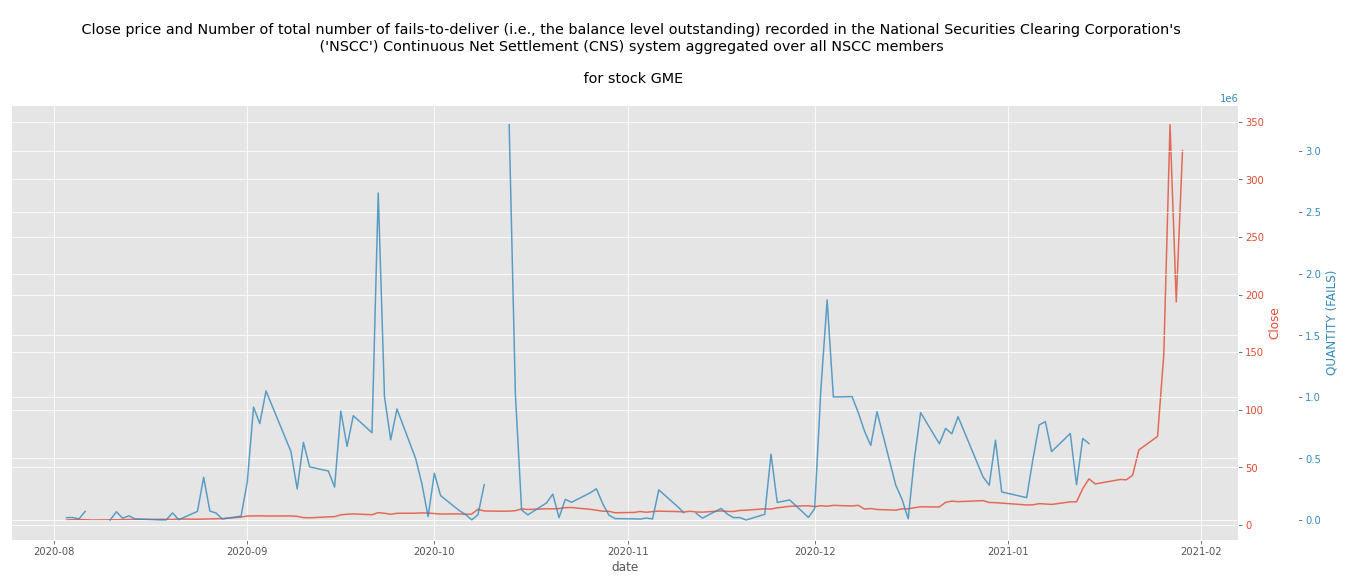

In [116]:
ax1 = plt.gca()

ax1.set_xlabel("date")
ax1.set_yticks([])

for i, column in enumerate(["Close", "QUANTITY (FAILS)"]):
    ax = ax1.twinx()
    ax.set_ylabel(column, color=f"C{i}")
    ax.tick_params(axis="y", labelcolor=f"C{i}")
    if column == "action":
        plotter = ax.scatter
    else:
        plotter = ax.plot
    plotter(j_df.index, j_df[column], color=f"C{i}", alpha=0.8)
    ax.yaxis.tick_right()
    ax.spines["right"].set_position(("outward", 60 * i))
plt.title("""
    Close price and Number of total number of fails-to-deliver (i.e., the balance level outstanding) recorded in the National Securities Clearing Corporation's 
    ('NSCC') Continuous Net Settlement (CNS) system aggregated over all NSCC members \n
    for stock GME
""")